# Ames House Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [15]:
# Let's see what the data looks like
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
data.shape

(1460, 81)

In [4]:
data = data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

The following variables are dropped because they have very few observations and won't contribute much to our analysis.

1. Alley: Type of alley access to property (whether it is gravel or pavel)
2. FireplaceQu: The quality of the fireplace, whether it is in good, poor, etc., condition
3. PoolQC: Quality of the pool, whether it is good, fair, poor, etc.
4. Fence: Quality of the fence
5. MiscFeature: Whether the property has some other feature, such as a tennis court, a second garage, elevator, or some additional feature

Next, drop all rows with missing data.

In [4]:
# Code for dropping all missing values from data
data.dropna(axis=0, how='any')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
# After dropping missing values, there are X rows of data
data.shape

(1460, 81)

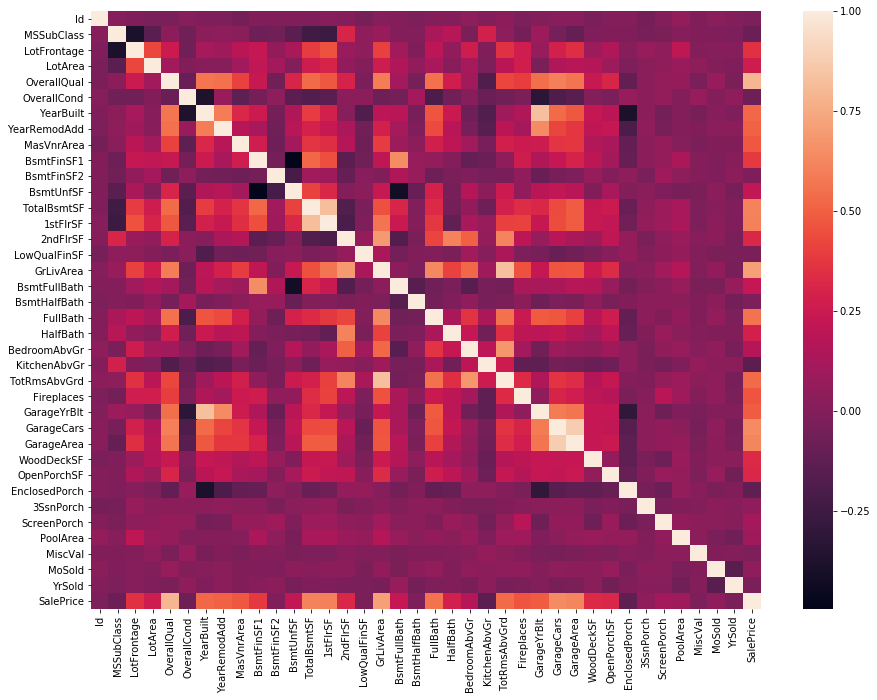

In [14]:
# How correlated are variables?
corr_all = data.corr(method='pearson')
f, ax = plt.subplots(figsize = (15, 11))
sns.heatmap(corr_all)

In [12]:
corrs2 = corr_all.ix[-1][:-1]
corrs2_dict = corrs2.to_dict()
corrs2_dict

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


{'1stFlrSF': 0.6058521846919166,
 '2ndFlrSF': 0.31933380283206614,
 '3SsnPorch': 0.044583665335747917,
 'BedroomAbvGr': 0.16821315430074149,
 'BsmtFinSF1': 0.38641980624215627,
 'BsmtFinSF2': -0.011378121450215216,
 'BsmtFullBath': 0.22712223313149718,
 'BsmtHalfBath': -0.016844154297359294,
 'BsmtUnfSF': 0.214479105546969,
 'EnclosedPorch': -0.12857795792595636,
 'Fireplaces': 0.46692883675152419,
 'FullBath': 0.5606637627484452,
 'GarageArea': 0.62343143891835984,
 'GarageCars': 0.64040919725834899,
 'GarageYrBlt': 0.48636167748786213,
 'GrLivArea': 0.70862447761265113,
 'HalfBath': 0.2841076755947784,
 'Id': -0.021916719443431112,
 'KitchenAbvGr': -0.13590737084214169,
 'LotArea': 0.26384335387140628,
 'LotFrontage': 0.35179909657067854,
 'LowQualFinSF': -0.025606130000680152,
 'MSSubClass': -0.08428413512659523,
 'MasVnrArea': 0.47749304709571072,
 'MiscVal': -0.021189579640303789,
 'MoSold': 0.046432245223819363,
 'OpenPorchSF': 0.31585622711605577,
 'OverallCond': -0.077855894048

In [13]:
# Reorder by level of correlation
print("FEATURE \tCORRELATION")
for attr in sorted(corrs2_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*attr))

FEATURE 	CORRELATION
OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCond: 	-0.0778558940486776
MoSold: 	0.04643224522381936
3SsnP

It looks like variables such as overall quality, garage size, total floor area on 1st flr, basement area, number of full baths, and the year built/remodeled are most indicative of a higher sale price.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001335BCE2828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001335C971668>]], dtype=object)

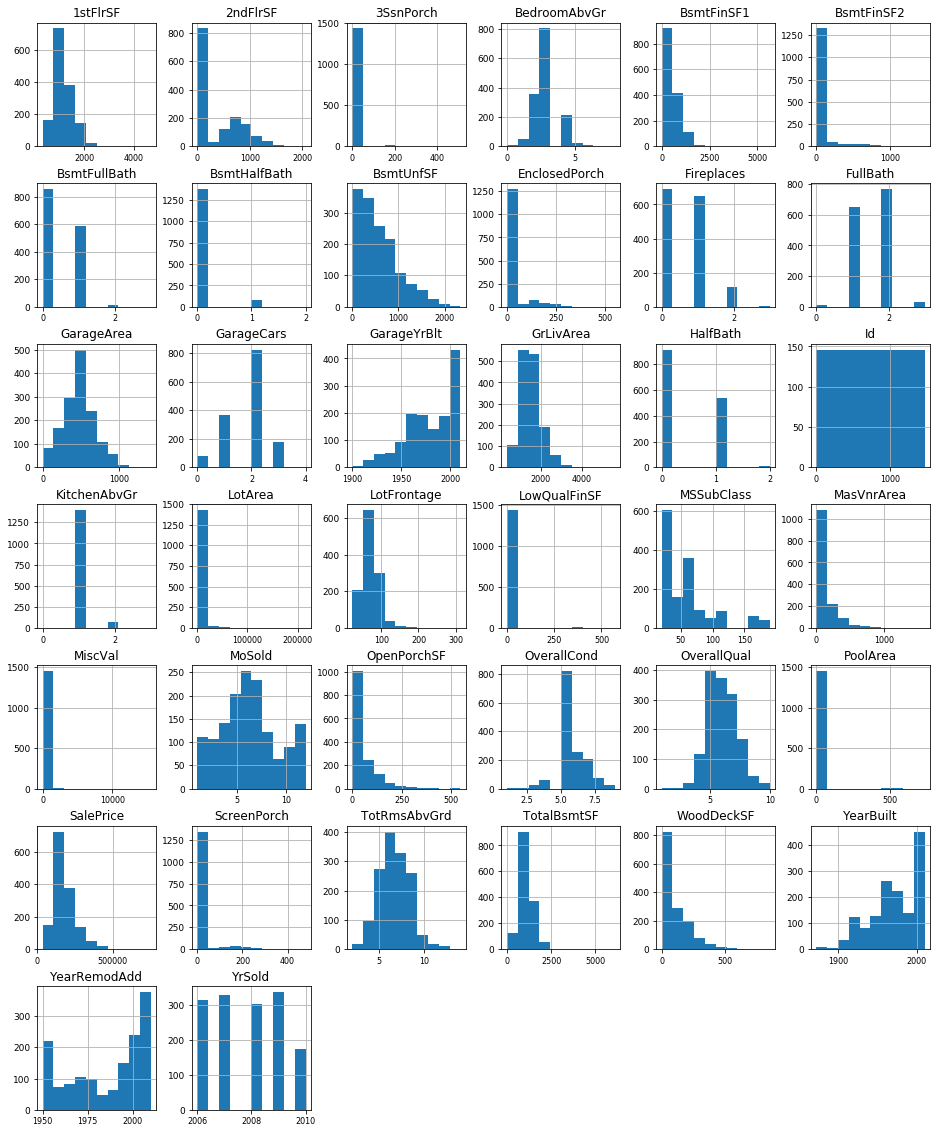

In [17]:
# What do the distributions of different variables look like?
data.hist(figsize=(16, 20), xlabelsize = 8, ylabelsize = 9)

Not all variables are normally distributed - these will need to be normalized.